In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stat = pd.read_csv('static.csv')
stat.head()

,Unnamed: 0,fips,country,state,county,level,lat,locationId,long,population,...,actuals.vaccinationsInitiatedDemographics.age.65-79,actuals.vaccinationsInitiatedDemographics.age.12-24,actuals.vaccinationsInitiatedDemographics.age.16-20,actuals.vaccinationsInitiatedDemographics.age.21-25,actuals.vaccinationsInitiatedDemographics.age.26-30,actuals.vaccinationsInitiatedDemographics.age.31-40,actuals.vaccinationsInitiatedDemographics.age.41-50,actuals.vaccinationsInitiatedDemographics.age.51-60,actuals.vaccinationsInitiatedDemographics.age.61-70,actuals.vaccinationsInitiatedDemographics.age.71_plus
0,0,2013,US,AK,Aleutians East Borough,county,NaN,iso1:us#iso2:us-ak#fips:02013,NaN,3337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016,US,AK,Aleutians West Census Area,county,NaN,iso1:us#iso2:us-ak#fips:02016,NaN,5634,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020,US,AK,Anchorage Municipality,county,NaN,iso1:us#iso2:us-ak#fips:02020,NaN,288000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2050,US,AK,Bethel Census Area,county,NaN,iso1:us#iso2:us-ak#fips:02050,NaN,18386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2060,US,AK,Bristol Bay Borough,county,NaN,iso1:us#iso2:us-ak#fips:02060,NaN,836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
drop_col = [col for col in stat if col.startswith('annotations')]
stat = stat.drop(drop_col, axis= 1)
stat = stat.drop('Unnamed: 0', axis= 1)
stat.shape

(3223, 165)

In [4]:
stat= stat.dropna(how= 'all', axis=1)

In [5]:
stat.shape

(3223, 154)

In [6]:
stat = stat.astype({'fips': 'category'})

In [7]:
stat.describe()

,population,cdcTransmissionLevel,metrics.testPositivityRatio,metrics.caseDensity,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuCapacityRatio,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,metrics.vaccinationsAdditionalDoseRatio,...,actuals.vaccinationsInitiatedDemographics.age.65-79,actuals.vaccinationsInitiatedDemographics.age.12-24,actuals.vaccinationsInitiatedDemographics.age.16-20,actuals.vaccinationsInitiatedDemographics.age.21-25,actuals.vaccinationsInitiatedDemographics.age.26-30,actuals.vaccinationsInitiatedDemographics.age.31-40,actuals.vaccinationsInitiatedDemographics.age.41-50,actuals.vaccinationsInitiatedDemographics.age.51-60,actuals.vaccinationsInitiatedDemographics.age.61-70,actuals.vaccinationsInitiatedDemographics.age.71_plus
count,3.223000e+03,3223.000000,2784.000000,3220.000000,3076.000000,3076.000000,1422.000000,3196.000000,3196.000000,3029.000000,...,254.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,1.028504e+05,1.537388,0.040986,10.153820,0.814142,0.806691,0.640710,0.584299,0.518341,0.235275,...,10868.078740,2259.800000,1005.781818,1013.381818,981.636364,2103.545455,2479.945455,2976.581818,3511.836364,3406.690909
std,3.294640e+05,0.907115,0.048218,24.182777,0.187875,0.320946,0.226064,0.140344,0.125987,0.089757,...,35743.549899,2981.970908,1257.626051,1450.597750,1364.029873,2747.764282,2906.603723,3220.036017,3675.482598,3443.340695
min,8.600000e+01,0.000000,0.000000,0.000000,0.120000,0.100000,0.070000,0.145000,0.111000,0.051000,...,6.000000,259.000000,121.000000,92.000000,96.000000,244.000000,331.000000,514.000000,606.000000,592.000000
25%,1.111200e+04,1.000000,0.019000,3.000000,0.677500,0.560000,0.490000,0.485000,0.429000,0.169000,...,695.250000,557.000000,292.000000,250.500000,240.500000,530.000000,696.500000,1001.500000,1342.500000,1410.500000
50%,2.603200e+04,1.000000,0.029000,5.600000,0.810000,0.870000,0.670000,0.567500,0.505500,0.218000,...,2134.000000,1221.000000,573.000000,516.000000,475.000000,1053.000000,1419.000000,1869.000000,2400.000000,2152.000000
75%,6.704200e+04,2.000000,0.046000,10.100000,0.970000,1.100000,0.820000,0.662000,0.588000,0.284000,...,5922.250000,2605.500000,1125.000000,1106.000000,1052.000000,2187.500000,2986.000000,3387.500000,4099.000000,4206.000000
max,1.003911e+07,3.000000,1.000000,957.700000,1.820000,1.280000,1.500000,0.950000,0.950000,0.640000,...,404109.000000,15644.000000,6841.000000,7681.000000,7088.000000,14960.000000,17078.000000,19540.000000,23256.000000,21541.000000


In [8]:
stat.describe(include= 'O')

,country,state,county,level,locationId,lastUpdatedDate,url,metrics.testPositivityRatioDetails.source
count,3223,3223,3223,3223,3223,3223,3219,3223
unique,1,53,1958,1,3223,1,3219,1
top,US,TX,Washington County,county,iso1:us#iso2:us-ak#fips:02013,2022-03-24,https://covidactnow.org/us/alaska-ak/county/al...,other
freq,3223,254,30,3223,1,3223,1,3223


In [9]:
stat = stat.drop(['country', 'level', 'lastUpdatedDate', 'url', 'metrics.testPositivityRatioDetails.source'], axis= 1)

In [10]:
sum(stat.groupby(['state','county'])['fips'].count())

3223

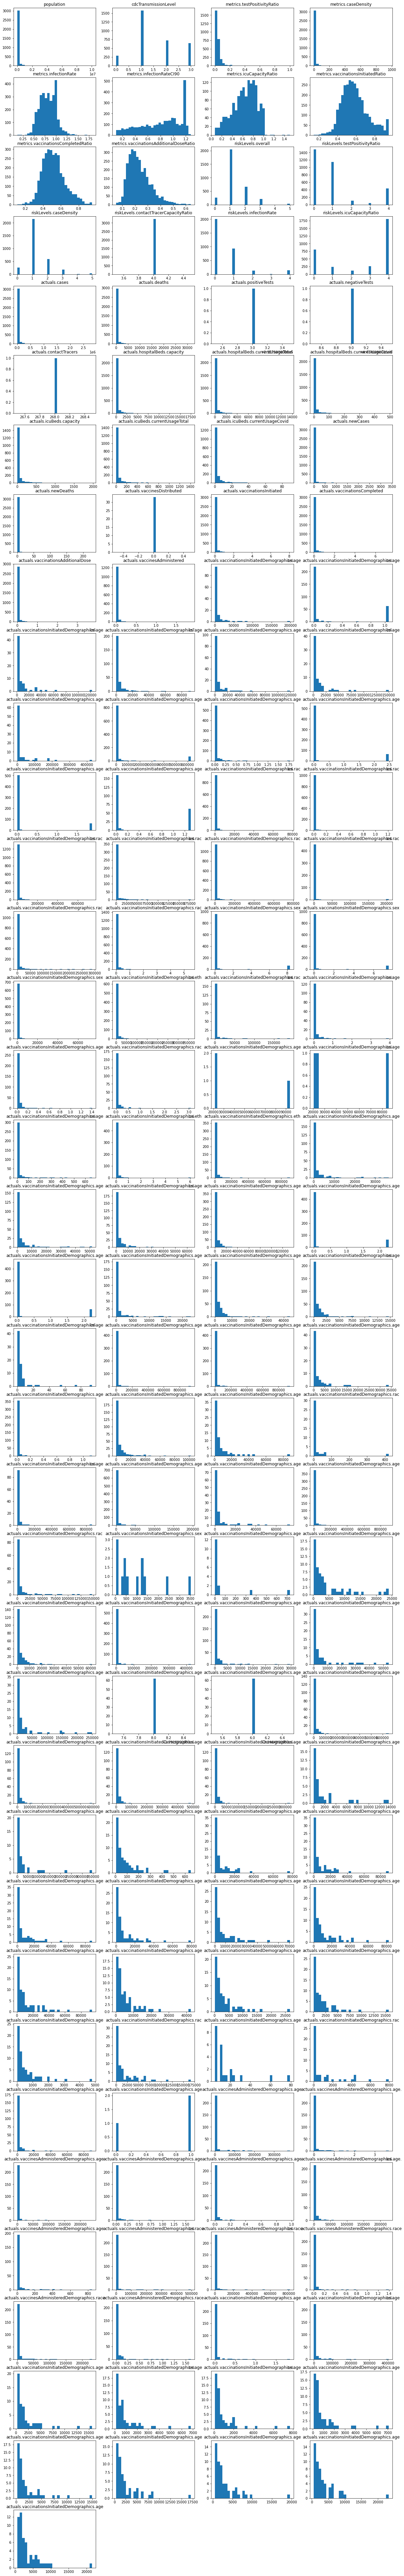

In [11]:
plt.figure(figsize= (20, 150))

for a, col in enumerate([col for col in stat if stat[col].dtype == 'int64' or stat[col].dtype == 'float64']):
    plt.subplot(40,4, a+1)
    plt.hist(stat[col], bins=30)
    plt.title(col[:45])

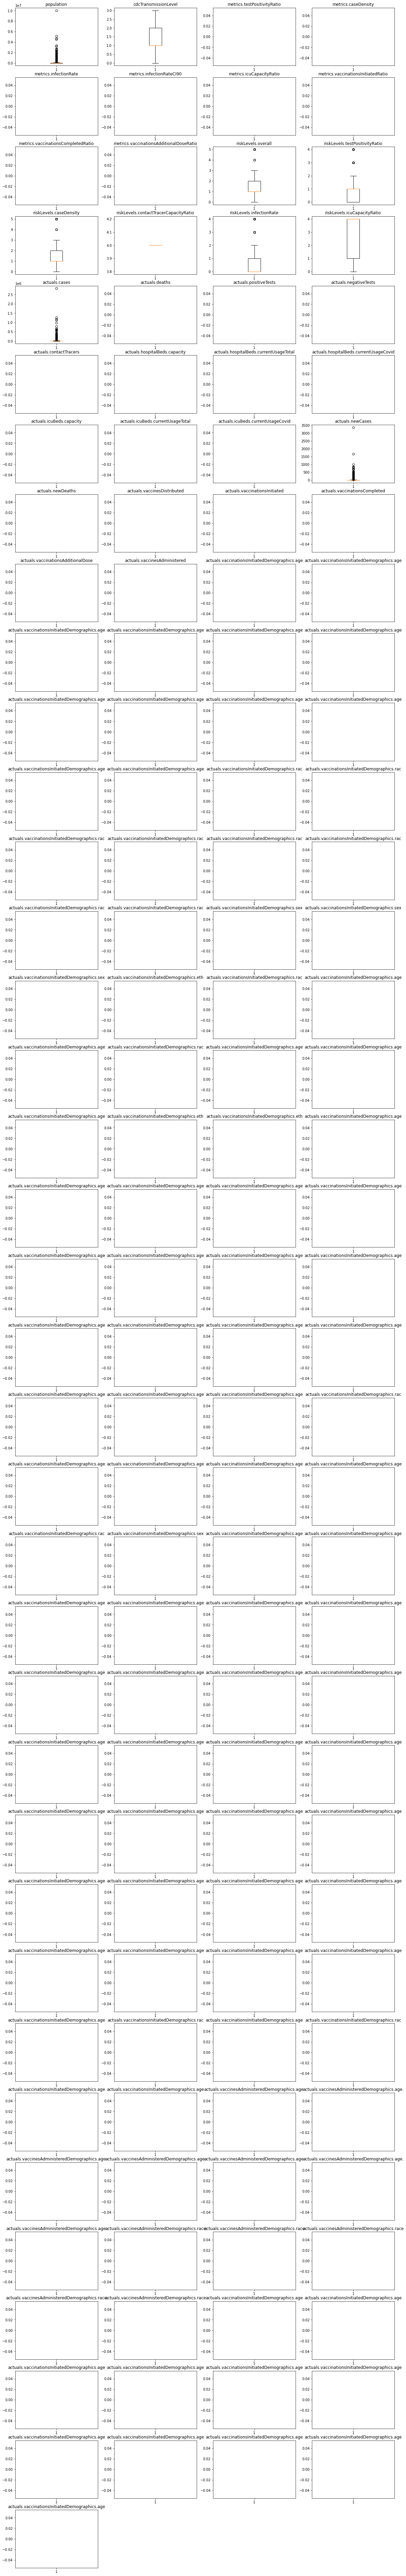

In [12]:
plt.figure(figsize= (20, 150))

for a, col in enumerate([col for col in stat if stat[col].dtype == 'int64' or stat[col].dtype == 'float64']):
    plt.subplot(40,4, a+1)
    plt.boxplot(stat[col])
    plt.title(col[:45])

In [13]:
for col in stat.columns:
    print(col)

fips
state
county
locationId
population
cdcTransmissionLevel
metrics.testPositivityRatio
metrics.caseDensity
metrics.infectionRate
metrics.infectionRateCI90
metrics.icuCapacityRatio
metrics.vaccinationsInitiatedRatio
metrics.vaccinationsCompletedRatio
metrics.vaccinationsAdditionalDoseRatio
riskLevels.overall
riskLevels.testPositivityRatio
riskLevels.caseDensity
riskLevels.contactTracerCapacityRatio
riskLevels.infectionRate
riskLevels.icuCapacityRatio
actuals.cases
actuals.deaths
actuals.positiveTests
actuals.negativeTests
actuals.contactTracers
actuals.hospitalBeds.capacity
actuals.hospitalBeds.currentUsageTotal
actuals.hospitalBeds.currentUsageCovid
actuals.icuBeds.capacity
actuals.icuBeds.currentUsageTotal
actuals.icuBeds.currentUsageCovid
actuals.newCases
actuals.newDeaths
actuals.vaccinesDistributed
actuals.vaccinationsInitiated
actuals.vaccinationsCompleted
actuals.vaccinationsAdditionalDose
actuals.vaccinesAdministered
actuals.vaccinationsInitiatedDemographics.age.0-17
actuals.v

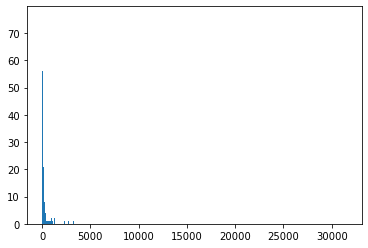

In [14]:
plt.hist(stat['actuals.deaths'], bins= 10000);

In [15]:
stat[stat['actuals.deaths'] > 5000][['state','county','actuals.deaths', 'population']]

,state,county,actuals.deaths,population
178,AZ,Maricopa County,16393.0,4485414
204,CA,Los Angeles County,31535.0,10039107
215,CA,Orange County,6856.0,3175692
218,CA,Riverside County,6436.0,2470546
221,CA,San Bernardino County,6811.0,2180085
222,CA,San Diego County,5141.0,3338330
325,FL,Broward County,5710.0,1952778
362,FL,Miami-Dade County,10643.0,2716940
709,IL,Cook County,14781.0,5150233
1312,MI,Wayne County,7849.0,1749343


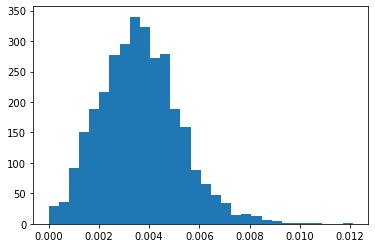

In [16]:
plt.hist(stat['actuals.deaths'] / stat['population'], bins= 30);

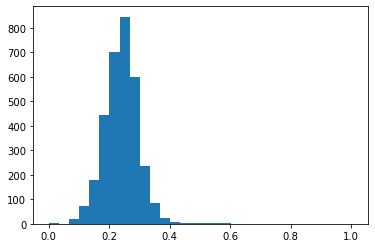

In [17]:
plt.hist(stat['actuals.cases'] / stat['population'], bins= 30);

In [18]:
stat[stat['actuals.cases'] / stat['population'] > .4][['state','county','actuals.cases','actuals.deaths', 'population']]

,state,county,actuals.cases,actuals.deaths,population
3,AK,Bethel Census Area,9894,41.0,18386
4,AK,Bristol Bay Borough,608,2.0,836
14,AK,Kusilvak Census Area,3989,12.0,8314
17,AK,Nome Census Area,5833,5.0,10004
18,AK,North Slope Borough,4342,11.0,9832
19,AK,Northwest Arctic Borough,4440,13.0,7621
249,CO,Bent County,2510,47.0,5577
257,CO,Crowley County,3152,28.0,6061
362,FL,Miami-Dade County,1172461,10643.0,2716940
412,GA,Chattahoochee County,7051,22.0,10907


In [19]:
stat['caseRatio'] = stat['actuals.cases'] / stat['population']
stat['deathRatio'] = stat['actuals.deaths'] / stat['population']

<AxesSubplot:>

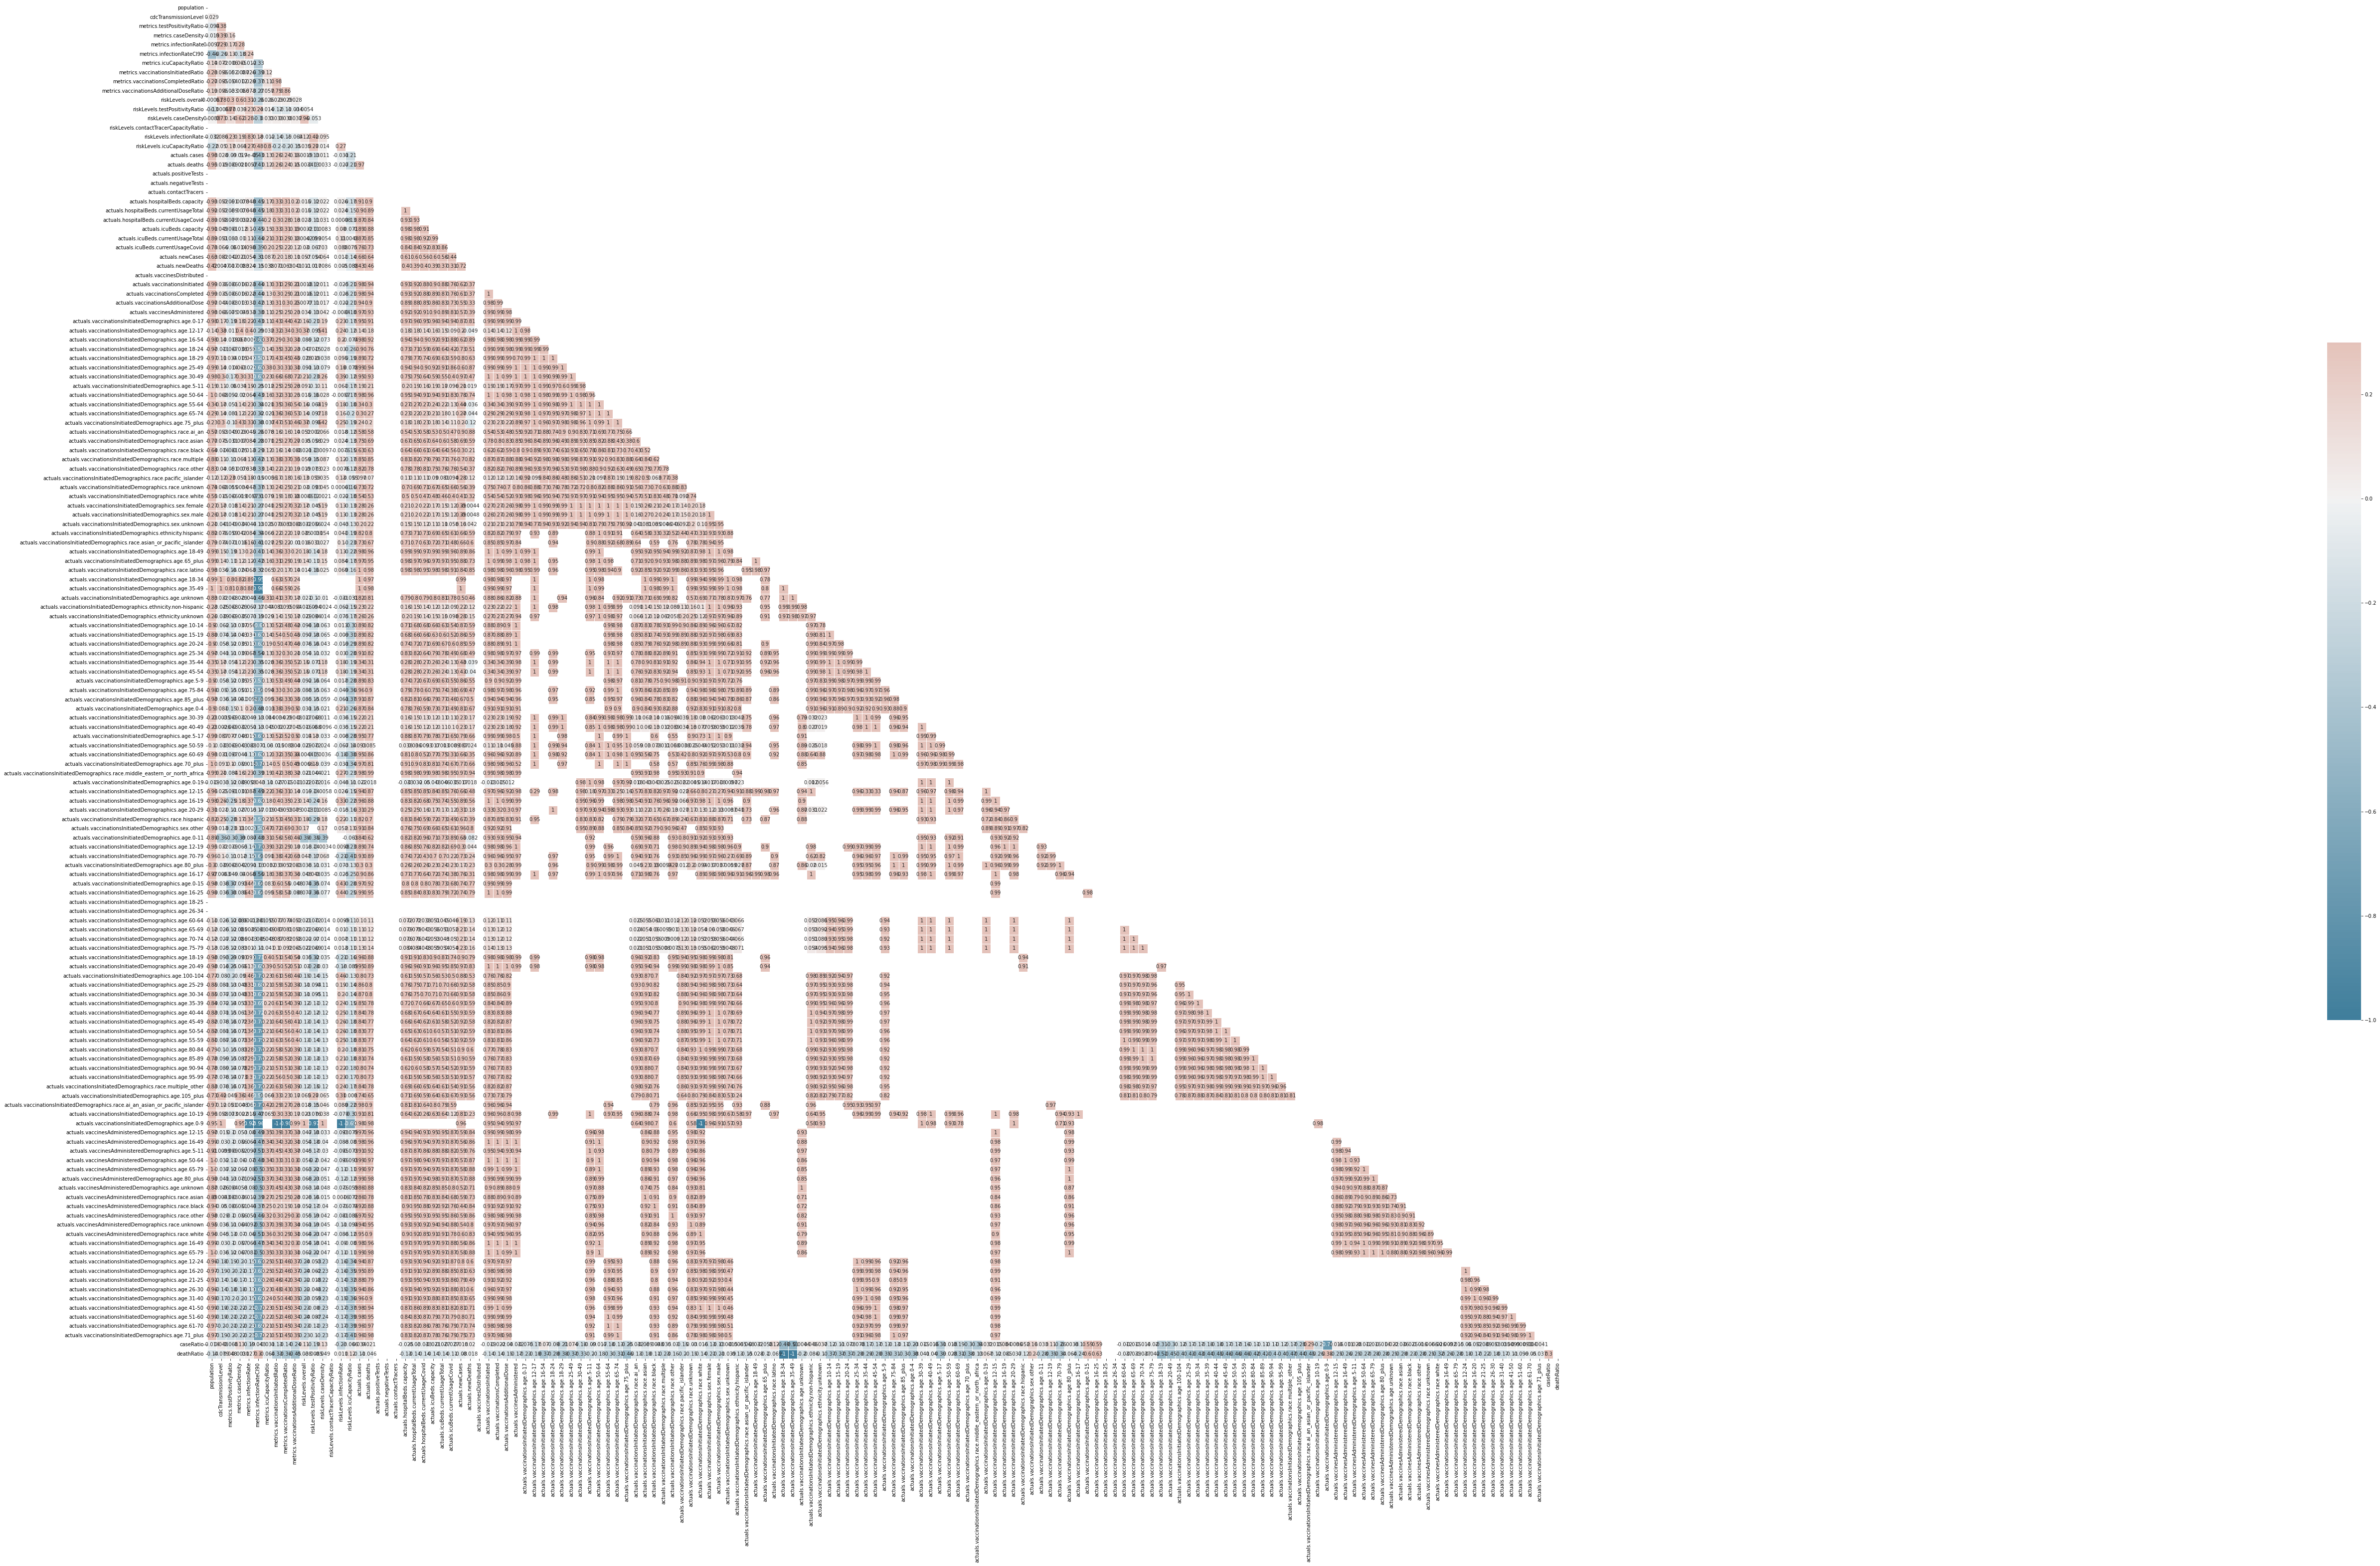

In [20]:
corr = stat.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(550, 50))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot= True)

In [21]:
stat.corr()

,population,cdcTransmissionLevel,metrics.testPositivityRatio,metrics.caseDensity,metrics.infectionRate,metrics.infectionRateCI90,metrics.icuCapacityRatio,metrics.vaccinationsInitiatedRatio,metrics.vaccinationsCompletedRatio,metrics.vaccinationsAdditionalDoseRatio,...,actuals.vaccinationsInitiatedDemographics.age.16-20,actuals.vaccinationsInitiatedDemographics.age.21-25,actuals.vaccinationsInitiatedDemographics.age.26-30,actuals.vaccinationsInitiatedDemographics.age.31-40,actuals.vaccinationsInitiatedDemographics.age.41-50,actuals.vaccinationsInitiatedDemographics.age.51-60,actuals.vaccinationsInitiatedDemographics.age.61-70,actuals.vaccinationsInitiatedDemographics.age.71_plus,caseRatio,deathRatio
population,1.000000,0.029316,-0.094030,-0.018854,0.009737,-0.457230,0.144735,0.282648,0.266452,0.188666,...,0.973634,0.914216,0.962205,0.983272,0.987900,0.985609,0.971120,0.965696,-0.013878,-0.138900
cdcTransmissionLevel,0.029316,1.000000,0.384268,0.394079,0.288084,-0.257625,0.071675,0.096192,0.094799,0.095982,...,-0.187234,-0.135242,-0.144546,-0.167807,-0.185824,-0.194684,-0.199460,-0.191239,0.047970,-0.079348
metrics.testPositivityRatio,-0.094030,0.384268,1.000000,0.156689,0.165900,0.125149,-0.006032,-0.051554,-0.054373,-0.032591,...,-0.198234,-0.164384,-0.180259,-0.195320,-0.214401,-0.207550,-0.210674,-0.201689,-0.068011,0.047982
metrics.caseDensity,-0.018854,0.394079,0.156689,1.000000,0.283755,-0.180468,0.065099,-0.008738,-0.011788,-0.006613,...,-0.210887,-0.172960,-0.176161,-0.199407,-0.215483,-0.223378,-0.218929,-0.216771,0.128804,-0.003073
metrics.infectionRate,0.009737,0.288084,0.165900,0.283755,1.000000,0.240281,-0.012404,0.026102,0.029341,0.073278,...,-0.167965,-0.109703,-0.131375,-0.153613,-0.207864,-0.205000,-0.232115,-0.225378,-0.186752,0.026648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
actuals.vaccinationsInitiatedDemographics.age.51-60,0.985609,-0.194684,-0.207550,-0.223378,-0.205000,-0.697265,0.217659,0.520854,0.455507,0.337480,...,0.967329,0.877608,0.943076,0.973182,0.995236,1.000000,0.992754,0.987515,-0.000915,-0.099269
actuals.vaccinationsInitiatedDemographics.age.61-70,0.971120,-0.199460,-0.210674,-0.218929,-0.232115,-0.693881,0.211679,0.512365,0.451970,0.340461,...,0.949005,0.851392,0.923884,0.955613,0.987590,0.992754,1.000000,0.995063,0.013817,-0.050240
actuals.vaccinationsInitiatedDemographics.age.71_plus,0.965696,-0.191239,-0.201689,-0.216771,-0.225378,-0.695174,0.211860,0.514337,0.454661,0.354542,...,0.936609,0.840103,0.914419,0.944941,0.977765,0.987515,0.995063,1.000000,0.004105,-0.037154
caseRatio,-0.013878,0.047970,-0.068011,0.128804,-0.186752,-0.042829,-0.030839,-0.125129,-0.139250,-0.242987,...,-0.052216,-0.088948,-0.053408,-0.035406,0.009922,-0.000915,0.013817,0.004105,1.000000,0.300139


In [40]:
import numpy as np
import statsmodels.api as sm

x = stat[columns]
y = stat['actuals.deaths'].dropna()
results = sm.OLS(y, x).fit()
print(results.summary())


MissingDataError: exog contains inf or nans

In [35]:
columns = [col for col in stat if stat[col].dtype == 'int64' or stat[col].dtype == 'float64']

In [36]:
columns.remove('actuals.deaths')

In [37]:
columns

['population',
 'cdcTransmissionLevel',
 'metrics.testPositivityRatio',
 'metrics.caseDensity',
 'metrics.infectionRate',
 'metrics.infectionRateCI90',
 'metrics.icuCapacityRatio',
 'metrics.vaccinationsInitiatedRatio',
 'metrics.vaccinationsCompletedRatio',
 'metrics.vaccinationsAdditionalDoseRatio',
 'riskLevels.overall',
 'riskLevels.testPositivityRatio',
 'riskLevels.caseDensity',
 'riskLevels.contactTracerCapacityRatio',
 'riskLevels.infectionRate',
 'riskLevels.icuCapacityRatio',
 'actuals.cases',
 'actuals.positiveTests',
 'actuals.negativeTests',
 'actuals.contactTracers',
 'actuals.hospitalBeds.capacity',
 'actuals.hospitalBeds.currentUsageTotal',
 'actuals.hospitalBeds.currentUsageCovid',
 'actuals.icuBeds.capacity',
 'actuals.icuBeds.currentUsageTotal',
 'actuals.icuBeds.currentUsageCovid',
 'actuals.newCases',
 'actuals.newDeaths',
 'actuals.vaccinesDistributed',
 'actuals.vaccinationsInitiated',
 'actuals.vaccinationsCompleted',
 'actuals.vaccinationsAdditionalDose',
 'act

In [34]:
stat.dtypes

fips                                                     category
state                                                      object
county                                                     object
locationId                                                 object
population                                                  int64
                                                           ...   
actuals.vaccinationsInitiatedDemographics.age.51-60       float64
actuals.vaccinationsInitiatedDemographics.age.61-70       float64
actuals.vaccinationsInitiatedDemographics.age.71_plus     float64
caseRatio                                                 float64
deathRatio                                                float64
Length: 151, dtype: object

In [43]:
stat[columns].isna().sum()

population                                                  0
cdcTransmissionLevel                                        0
metrics.testPositivityRatio                               439
metrics.caseDensity                                         3
metrics.infectionRate                                     147
                                                         ... 
actuals.vaccinationsInitiatedDemographics.age.51-60      3168
actuals.vaccinationsInitiatedDemographics.age.61-70      3168
actuals.vaccinationsInitiatedDemographics.age.71_plus    3168
caseRatio                                                   0
deathRatio                                                 78
Length: 146, dtype: int64